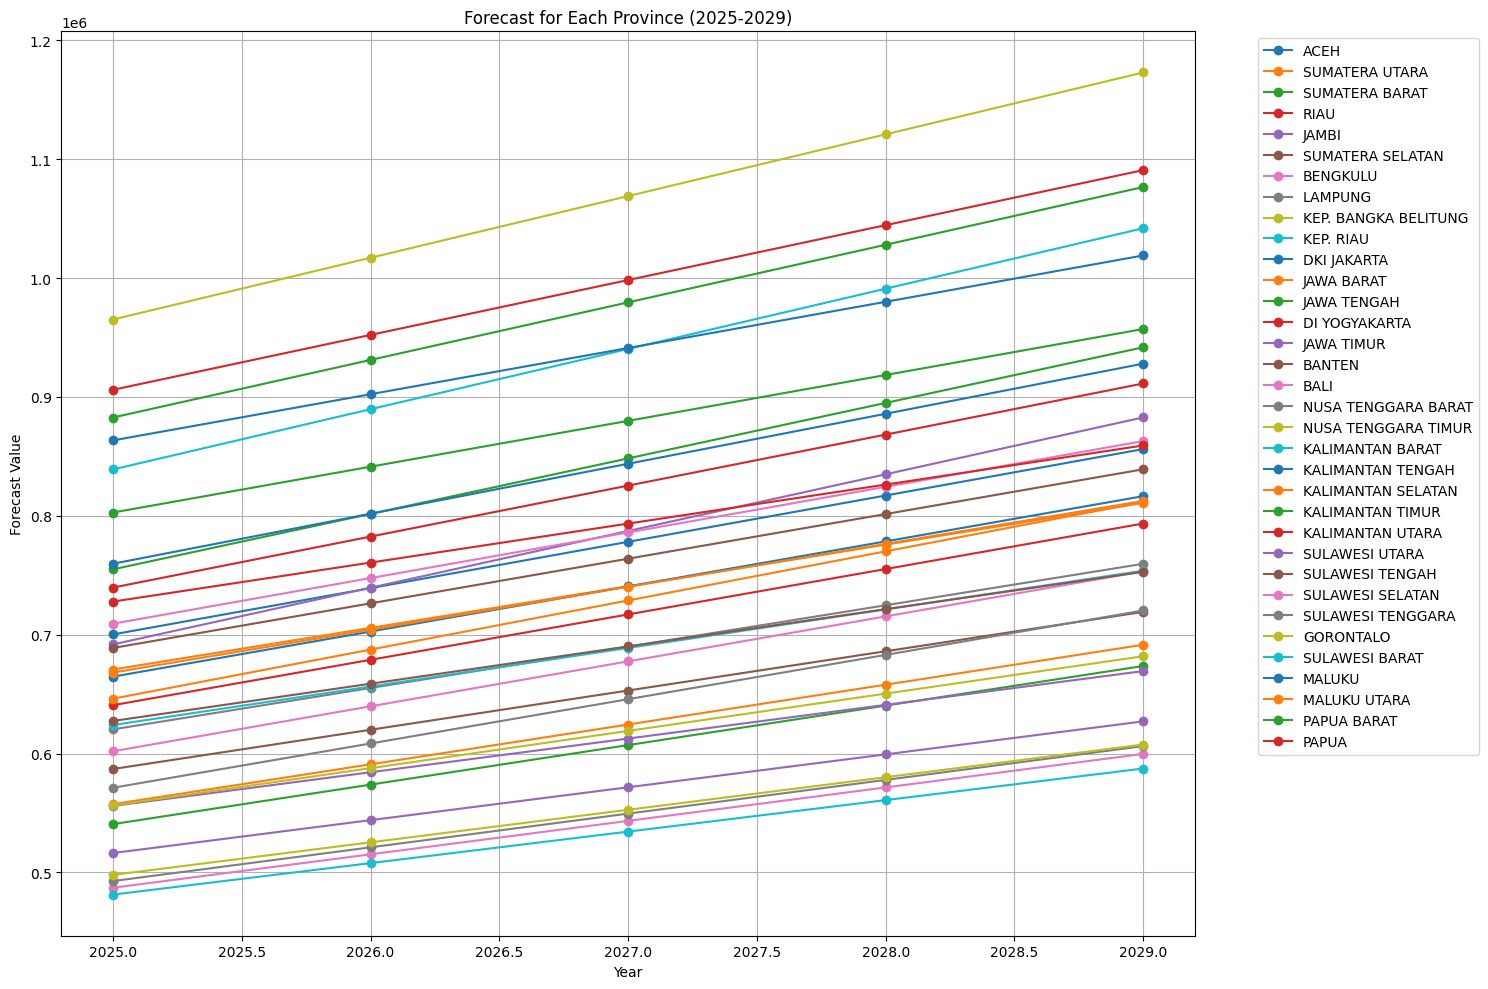

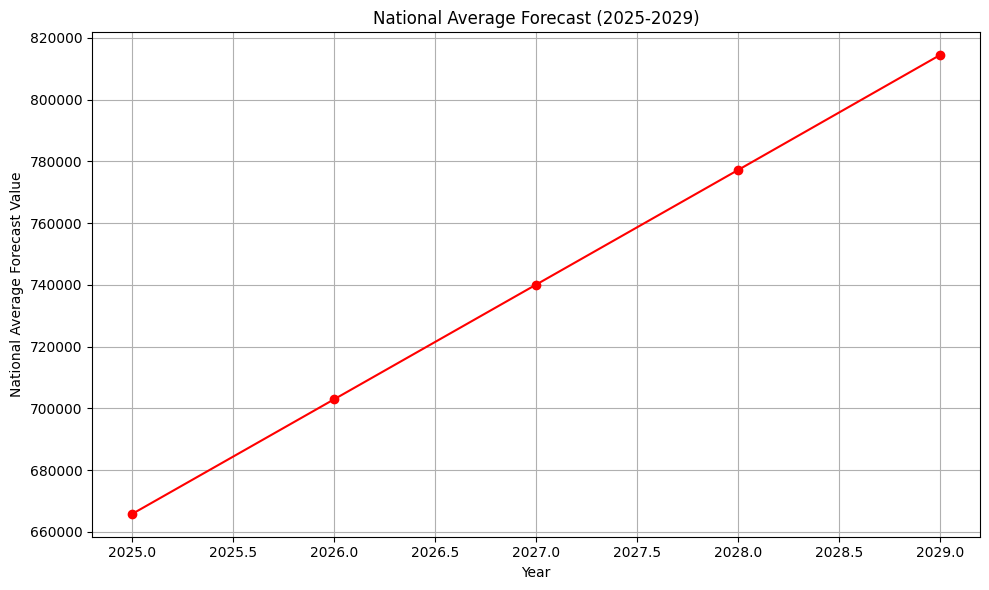

Province-wise forecasts are visualized in 'province_forecasts.png'
National average forecast is visualized in 'national_forecast.png'


In [3]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import re

# The content of the file is provided in the prompt.
file_content = """
ACEH 2025 = 700196.84
ACEH 2026 = 739156.07
ACEH 2027 = 778115.31
ACEH 2028 = 817074.54
ACEH 2029 = 856140.51
SUMATERA UTARA 2025 = 670670.04
SUMATERA UTARA 2026 = 705699.24
SUMATERA UTARA 2027 = 740728.45
SUMATERA UTARA 2028 = 775757.65
SUMATERA UTARA 2029 = 810882.82
SUMATERA BARAT 2025 = 754937.48
SUMATERA BARAT 2026 = 801614.42
SUMATERA BARAT 2027 = 848291.37
SUMATERA BARAT 2028 = 894968.31
SUMATERA BARAT 2029 = 941773.14
RIAU 2025 = 739619.08
RIAU 2026 = 782516.81
RIAU 2027 = 825414.54
RIAU 2028 = 868312.27
RIAU 2029 = 911327.53
JAMBI 2025 = 691783.27
JAMBI 2026 = 739501.91
JAMBI 2027 = 787220.55
JAMBI 2028 = 834939.19
JAMBI 2029 = 882788.57
SUMATERA SELATAN 2025 = 586973.88
SUMATERA SELATAN 2026 = 619999.16
SUMATERA SELATAN 2027 = 653024.45
SUMATERA SELATAN 2028 = 686049.73
SUMATERA SELATAN 2029 = 719165.50
BENGKULU 2025 = 709228.96
BENGKULU 2026 = 747616.41
BENGKULU 2027 = 786003.86
BENGKULU 2028 = 824391.31
BENGKULU 2029 = 862883.93
LAMPUNG 2025 = 620326.33
LAMPUNG 2026 = 655131.69
LAMPUNG 2027 = 689937.05
LAMPUNG 2028 = 724742.41
LAMPUNG 2029 = 759643.13
KEP. BANGKA BELITUNG 2025 = 965145.33
KEP. BANGKA BELITUNG 2026 = 1017071.03
KEP. BANGKA BELITUNG 2027 = 1068996.73
KEP. BANGKA BELITUNG 2028 = 1120922.43
KEP. BANGKA BELITUNG 2029 = 1172990.39
KEP. RIAU 2025 = 838980.90
KEP. RIAU 2026 = 889679.59
KEP. RIAU 2027 = 940378.28
KEP. RIAU 2028 = 991076.97
KEP. RIAU 2029 = 1041914.56
DKI JAKARTA 2025 = 863415.96
DKI JAKARTA 2026 = 902291.91
DKI JAKARTA 2027 = 941167.87
DKI JAKARTA 2028 = 980043.82
DKI JAKARTA 2029 = 1019026.29
JAWA BARAT 2025 = 557397.27
JAWA BARAT 2026 = 590907.67
JAWA BARAT 2027 = 624418.07
JAWA BARAT 2028 = 657928.46
JAWA BARAT 2029 = 691530.67
JAWA TENGAH 2025 = 540619.54
JAWA TENGAH 2026 = 573859.21
JAWA TENGAH 2027 = 607098.88
JAWA TENGAH 2028 = 640338.54
JAWA TENGAH 2029 = 673669.27
DI YOGYAKARTA 2025 = 640658.86
DI YOGYAKARTA 2026 = 678847.92
DI YOGYAKARTA 2027 = 717036.98
DI YOGYAKARTA 2028 = 755226.04
DI YOGYAKARTA 2029 = 793519.72
JAWA TIMUR 2025 = 555921.62
JAWA TIMUR 2026 = 584266.12
JAWA TIMUR 2027 = 612610.62
JAWA TIMUR 2028 = 640955.11
JAWA TIMUR 2029 = 669377.27
BANTEN 2025 = 688788.11
BANTEN 2026 = 726352.95
BANTEN 2027 = 763917.79
BANTEN 2028 = 801482.63
BANTEN 2029 = 839150.39
BALI 2025 = 601884.24
BALI 2026 = 639717.40
BALI 2027 = 677550.56
BALI 2028 = 715383.72
BALI 2029 = 753320.54
NUSA TENGGARA BARAT 2025 = 571198.69
NUSA TENGGARA BARAT 2026 = 608462.82
NUSA TENGGARA BARAT 2027 = 645726.95
NUSA TENGGARA BARAT 2028 = 682991.08
NUSA TENGGARA BARAT 2029 = 720357.31
NUSA TENGGARA TIMUR 2025 = 556323.83
NUSA TENGGARA TIMUR 2026 = 587689.03
NUSA TENGGARA TIMUR 2027 = 619054.23
NUSA TENGGARA TIMUR 2028 = 650419.43
NUSA TENGGARA TIMUR 2029 = 681870.56
KALIMANTAN BARAT 2025 = 623957.81
KALIMANTAN BARAT 2026 = 656398.59
KALIMANTAN BARAT 2027 = 688839.37
KALIMANTAN BARAT 2028 = 721280.15
KALIMANTAN BARAT 2029 = 753809.81
KALIMANTAN TENGAH 2025 = 664691.47
KALIMANTAN TENGAH 2026 = 702623.19
KALIMANTAN TENGAH 2027 = 740554.91
KALIMANTAN TENGAH 2028 = 778486.63
KALIMANTAN TENGAH 2029 = 816522.27
KALIMANTAN SELATAN 2025 = 668111.32
KALIMANTAN SELATAN 2026 = 704192.02
KALIMANTAN SELATAN 2027 = 740272.72
KALIMANTAN SELATAN 2028 = 776353.41
KALIMANTAN SELATAN 2029 = 812532.96
KALIMANTAN TIMUR 2025 = 882679.35
KALIMANTAN TIMUR 2026 = 931126.05
KALIMANTAN TIMUR 2027 = 979572.74
KALIMANTAN TIMUR 2028 = 1028019.43
KALIMANTAN TIMUR 2029 = 1076598.86
KALIMANTAN UTARA 2025 = 905998.42
KALIMANTAN UTARA 2026 = 952174.11
KALIMANTAN UTARA 2027 = 998349.80
KALIMANTAN UTARA 2028 = 1044525.49
KALIMANTAN UTARA 2029 = 1090827.69
SULAWESI UTARA 2025 = 516281.15
SULAWESI UTARA 2026 = 543956.48
SULAWESI UTARA 2027 = 571631.81
SULAWESI UTARA 2028 = 599307.14
SULAWESI UTARA 2029 = 627058.29
SULAWESI TENGAH 2025 = 627397.72
SULAWESI TENGAH 2026 = 658748.01
SULAWESI TENGAH 2027 = 690098.30
SULAWESI TENGAH 2028 = 721448.58
SULAWESI TENGAH 2029 = 752884.76
SULAWESI SELATAN 2025 = 487085.01
SULAWESI SELATAN 2026 = 515222.48
SULAWESI SELATAN 2027 = 543359.95
SULAWESI SELATAN 2028 = 571497.41
SULAWESI SELATAN 2029 = 599711.97
SULAWESI TENGGARA 2025 = 492713.53
SULAWESI TENGGARA 2026 = 521083.53
SULAWESI TENGGARA 2027 = 549453.52
SULAWESI TENGGARA 2028 = 577823.52
SULAWESI TENGGARA 2029 = 606271.24
GORONTALO 2025 = 497898.12
GORONTALO 2026 = 525297.82
GORONTALO 2027 = 552697.52
GORONTALO 2028 = 580097.22
GORONTALO 2029 = 607571.99
SULAWESI BARAT 2025 = 481315.43
SULAWESI BARAT 2026 = 507819.77
SULAWESI BARAT 2027 = 534324.10
SULAWESI BARAT 2028 = 560828.44
SULAWESI BARAT 2029 = 587405.39
MALUKU 2025 = 759665.65
MALUKU 2026 = 801725.29
MALUKU 2027 = 843784.92
MALUKU 2028 = 885844.56
MALUKU 2029 = 928019.43
MALUKU UTARA 2025 = 646123.59
MALUKU UTARA 2026 = 687452.71
MALUKU UTARA 2027 = 728781.82
MALUKU UTARA 2028 = 770110.94
MALUKU UTARA 2029 = 811553.29
PAPUA BARAT 2025 = 802740.53
PAPUA BARAT 2026 = 841313.99
PAPUA BARAT 2027 = 879887.44
PAPUA BARAT 2028 = 918460.89
PAPUA BARAT 2029 = 957140.02
PAPUA 2025 = 727821.19
PAPUA 2026 = 760637.90
PAPUA 2027 = 793454.61
PAPUA 2028 = 826271.32
PAPUA 2029 = 859177.94
"""

# Use StringIO to simulate reading from a file
data = io.StringIO(file_content)

# Initialize lists to store parsed data
provinces = []
years = []
forecasts = []

# Parse the data
for line in data.readlines():
    # Remove source citations
    line = re.sub(r'\\', '', line).strip()
    if not line:
        continue

    # Split the line by '=' to separate the province/year from the forecast value
    parts = line.split('=')
    if len(parts) == 2:
        name_year_part = parts[0].strip()
        forecast_value = float(parts[1].strip())

        # Extract year (last 4 digits) and province name
        year = int(name_year_part[-4:])
        province_name = name_year_part[:-4].strip()

        provinces.append(province_name)
        years.append(year)
        forecasts.append(forecast_value)

# Create a DataFrame
df = pd.DataFrame({
    'Province': provinces,
    'Year': years,
    'Forecast': forecasts
})

# Calculate national forecast (mean for each year)
national_forecast = df.groupby('Year')['Forecast'].mean().reset_index()
national_forecast.rename(columns={'Forecast': 'National Average Forecast'}, inplace=True)

# Visualize each province's forecast
plt.figure(figsize=(15, 10))
for province in df['Province'].unique():
    province_data = df[df['Province'] == province]
    plt.plot(province_data['Year'], province_data['Forecast'], marker='o', label=province)

plt.title('Forecast for Each Province (2025-2029)')
plt.xlabel('Year')
plt.ylabel('Forecast Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('province_forecasts.png')
plt.show()

# Visualize national forecast
plt.figure(figsize=(10, 6))
plt.plot(national_forecast['Year'], national_forecast['National Average Forecast'], marker='o', color='red')
plt.title('National Average Forecast (2025-2029)')
plt.xlabel('Year')
plt.ylabel('National Average Forecast Value')
plt.grid(True)
plt.tight_layout()
plt.savefig('national_forecast.png')
plt.show()

print("Province-wise forecasts are visualized in 'province_forecasts.png'")
print("National average forecast is visualized in 'national_forecast.png'")